This notebook demonstrates the functionality of the CCL new implentation of modified gravity mu(z,k) and Sigma(z,k) but only featuring here the redshift dependence examples. 
This is a check that the completely new implementation with k and z gives the same results as the previous implementations for z only.   

In [1]:
import pyccl as ccl
import numpy as np
import matplotlib.pyplot as plt



First set some default cosmological parameters.


In [2]:
Omega_c = 0.25; Omega_b = 0.05; h = 0.7; A_s = 2.1e-9;
n_s = 0.96; Neff = 3.046; m_nu = 0.

Set up some different mu_0 / Sigma_0 parameters.

In [3]:
mu_0 = [0.3, -0.3, 0.3, -0.3]
sigma_0 = [0.3, -0.3, -0.3, -0.3]

Set up the cosmology objects, including one where mu_0 = sigma_0 = 0, the GR case.

In [4]:
cosmo_GR_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b,
                         h = h, A_s = A_s, n_s = n_s, Neff = Neff,
                         m_nu = m_nu, matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')

cosmo_1_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, 
                        h = h, A_s = A_s, n_s = n_s, Neff = Neff,
                        m_nu = m_nu, mu_0 = mu_0[0], sigma_0 = sigma_0[0],
                        matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')

cosmo_2_C = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h,
                        A_s = A_s, n_s = n_s, Neff = Neff,
                        m_nu = m_nu, mu_0 = mu_0[3], sigma_0 = sigma_0[3], 
                        matter_power_spectrum='linear',transfer_function='boltzmann_isitgr')



Compute the growth factors 

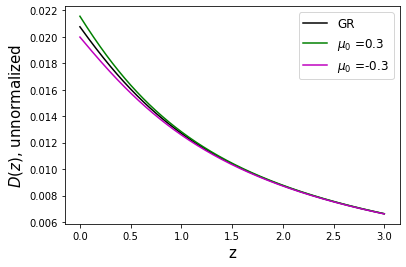

In [5]:
z = np.linspace(0., 3., 600)
a = 1. / (1. + z)

# the growth factor 
# is unaffected by Sigma, 
D_GR_C = ccl.growth_factor_unnorm(cosmo_GR_C, a)
D_1_C = ccl.growth_factor_unnorm(cosmo_1_C, a)
D_2_C = ccl.growth_factor_unnorm(cosmo_2_C, a)

plt.figure()
plt.plot(z, D_GR_C, 'k', label='GR')
plt.plot(z, D_1_C, 'g', label='$\mu_0$ ='+str(mu_0[0]))
plt.plot(z, D_2_C, 'm', label='$\mu_0$ ='+str(mu_0[1]))
plt.xlabel('z', fontsize=15)
plt.ylabel('$D(z)$, unnormalized', fontsize=15)
plt.legend(fontsize=12)
plt.show()

Compute the linear matter power spectrum (support for this parameterisation is limited to the linear regime). Again, the matter power spectrum is only affected by $\mu_0$, not $\Sigma_0$.

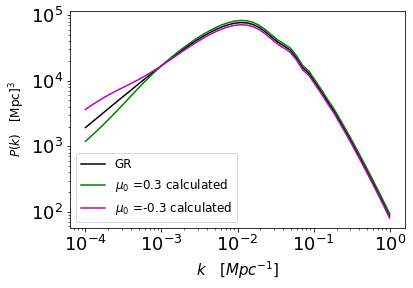

In [6]:
k = np.logspace(-4, 0) # 1 / Mpc units

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

Pk_GR_C = ccl.linear_matter_power(cosmo_GR_C, k, a=1.)
Pk_1_C = ccl.linear_matter_power(cosmo_1_C, k, a=1.)
Pk_2_C = ccl.linear_matter_power(cosmo_2_C, k, a=1.)

plt.loglog(k, Pk_GR_C, 'k', label='GR')

plt.loglog(k, Pk_1_C, 'g', label='$\mu_0$ ='+str(mu_0[0])+' calculated')

plt.loglog(k, Pk_2_C, 'm', label='$\mu_0$ ='+str(mu_0[3])+' calculated')
plt.xlabel('$k\quad[Mpc^{-1}]$', fontsize = 15)
plt.ylabel('$P(k)\quad[{\\rm Mpc}]^3$', fontsize=12)
plt.legend(fontsize=12)
plt.show()

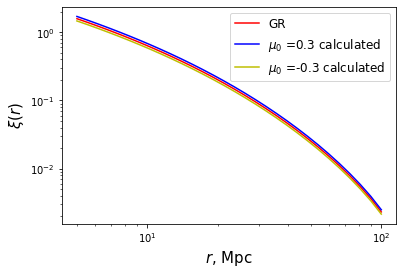

In [7]:
r = np.logspace(np.log10(5), np.log10(100), 30) # Mpc

corr_GR_C = ccl.correlation_3d(cosmo_GR_C, a=1., r=r)
corr_1_C = ccl.correlation_3d(cosmo_1_C, a=1., r=r)
corr_2_C = ccl.correlation_3d(cosmo_2_C, a=1., r=r)

plt.figure()
plt.loglog(r, corr_GR_C, 'r', label='GR')
plt.loglog(r, corr_1_C, 'b', label='$\mu_0$ ='+str(mu_0[0])+" calculated")
plt.loglog(r, corr_2_C, 'y', label='$\mu_0$ ='+str(mu_0[3])+" calculated")

plt.xlabel('$r$, Mpc', fontsize = 15)
plt.ylabel('$\\xi(r)$', fontsize=15)
plt.legend(fontsize=12)
plt.show()

Compute the lensing $C_\ell$ values. We need some redshift distributions.

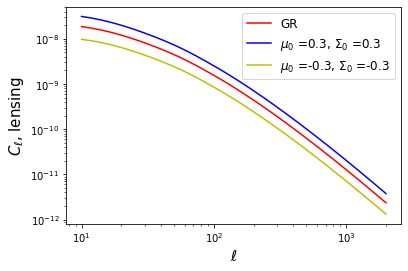

In [8]:
# Number density input
n = np.exp(-((z-0.5)/0.1)**2)
        
# ell range input
ell = np.arange(10, 2000)
     
# ClTracer objects

lens_GR_C = ccl.WeakLensingTracer(cosmo_GR_C, dndz=(z,n))
lens_1_C = ccl.WeakLensingTracer(cosmo_1_C, dndz=(z,n))
lens_2_C = ccl.WeakLensingTracer(cosmo_2_C, dndz=(z,n))

Cl_lensing_GR_C = ccl.angular_cl(cosmo_GR_C, lens_GR_C, lens_GR_C, ell)
Cl_lensing_1_C = ccl.angular_cl(cosmo_1_C, lens_1_C, lens_1_C, ell)
Cl_lensing_2_C = ccl.angular_cl(cosmo_2_C, lens_2_C, lens_2_C, ell)

plt.figure()
plt.loglog(ell, Cl_lensing_GR_C, 'r', label='GR')
plt.loglog(ell, Cl_lensing_1_C, 'b', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+ '')
plt.loglog(ell, Cl_lensing_2_C, 'y', 
           label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3])+ '')

plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell$, lensing', fontsize=15)
plt.legend(fontsize=12)
plt.show()

Compute the galaxy clustering $C_\ell$ values. With magnification turned off, this is independent of $\Sigma_0$.

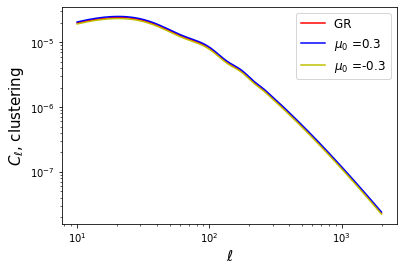

In [9]:
# Bias input
b = np.sqrt(1. + z)

# ClTracer objects
nc_GR_C = ccl.NumberCountsTracer(cosmo_GR_C, has_rsd=False, dndz=(z,n), bias=(z,b))
nc_1_C = ccl.NumberCountsTracer(cosmo_1_C, has_rsd=False, dndz=(z,n), bias=(z,b))
nc_2_C = ccl.NumberCountsTracer(cosmo_2_C, has_rsd=False, dndz=(z,n), bias=(z,b))

Cl_nc_GR_C = ccl.angular_cl(cosmo_GR_C, nc_GR_C, nc_GR_C, ell)
Cl_nc_1_C = ccl.angular_cl(cosmo_1_C, nc_1_C, nc_1_C, ell)
Cl_nc_2_C = ccl.angular_cl(cosmo_2_C, nc_2_C, nc_2_C, ell)

plt.figure()
plt.loglog(ell, Cl_nc_GR_C, 'r', label='GR ')
plt.loglog(ell, Cl_nc_1_C, 'b', label='$\mu_0$ ='+str(mu_0[0])+" ")
plt.loglog(ell, Cl_nc_2_C, 'y', label='$\mu_0$ ='+str(mu_0[3])+"")

plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell$, clustering', fontsize=15)
plt.legend(fontsize=12)
plt.show()

Compute the $C_\ell$ for the CMB lensing.

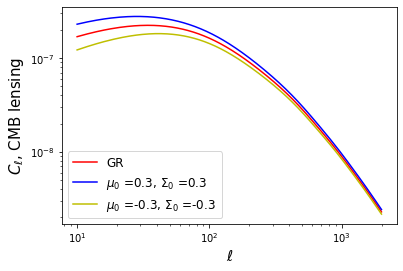

In [10]:
# Cl Tracer objects
cmbl_GR_C = ccl.CMBLensingTracer(cosmo_GR_C,1089.)
cmbl_1_C = ccl.CMBLensingTracer(cosmo_1_C,1089.)
cmbl_2_C = ccl.CMBLensingTracer(cosmo_2_C,1089.)

Cl_cmb_GR_C = ccl.angular_cl(cosmo_GR_C, cmbl_GR_C, cmbl_GR_C, ell)
Cl_cmb_1_C = ccl.angular_cl(cosmo_1_C, cmbl_1_C, cmbl_1_C, ell)
Cl_cmb_2_C = ccl.angular_cl(cosmo_2_C, cmbl_2_C, cmbl_2_C, ell)

plt.figure()
plt.loglog(ell, Cl_cmb_GR_C, 'r', label='GR')
plt.loglog(ell, Cl_cmb_1_C, 'b', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+" ")
plt.loglog(ell, Cl_cmb_2_C, 'y', 
           label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3])+" ")
plt.xlabel('$\ell$', fontsize=15)
plt.ylabel('$C_\ell$, CMB lensing', fontsize=15)
plt.legend(fontsize=12)
plt.show()

Now compute the 2D correlation functions for each of these cases.

Lensing first ($\xi_+$ and $\xi_-$):

/home/mishak/DEV/CCL/pyccl/correlations.py:84: CCLWarning: corr_type is deprecated. Use type = GG+
  CCLWarning)
/home/mishak/DEV/CCL/pyccl/correlations.py:84: CCLWarning: corr_type is deprecated. Use type = GG-
  CCLWarning)


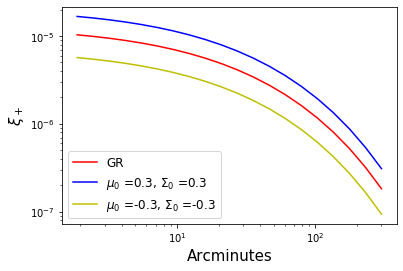

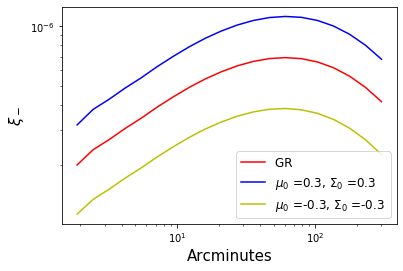

In [11]:
theta = np.logspace(-1.5, np.log10(5), 20) # In degrees

xi_p_GR_C = ccl.correlation(cosmo_GR_C, ell, Cl_lensing_GR_C, theta, 
                          corr_type='L+', method='fftlog')
xi_p_1_C = ccl.correlation(cosmo_1_C, ell, Cl_lensing_1_C, theta, 
                          corr_type='L+', method='fftlog')
xi_p_2_C = ccl.correlation(cosmo_2_C, ell, Cl_lensing_2_C, theta, 
                          corr_type='L+', method='fftlog')


xi_m_GR_C = ccl.correlation(cosmo_GR_C, ell, Cl_lensing_GR_C, theta,
                         corr_type='L-', method='fftlog')
xi_m_1_C = ccl.correlation(cosmo_1_C, ell, Cl_lensing_1_C, theta,
                         corr_type='L-', method='fftlog')
xi_m_2_C = ccl.correlation(cosmo_2_C, ell, Cl_lensing_2_C, theta, 
                         corr_type='L-', method='fftlog')

theta_amin = theta * 60. # In arcminutes.

plt.figure()
plt.loglog(theta_amin, xi_p_GR_C, 'r', label='GR')
plt.loglog(theta_amin, xi_p_1_C, 'b', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+"")
plt.loglog(theta_amin, xi_p_2_C, 'y', 
           label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3])+"")
plt.legend(fontsize=12)
plt.xlabel('Arcminutes', fontsize = 15)
plt.ylabel('$\\xi_+$', fontsize=15)
plt.show()

plt.figure()
plt.loglog(theta_amin, xi_m_GR_C, 'r', label='GR ')
plt.loglog(theta_amin, xi_m_1_C, 'b', 
           label='$\mu_0$ ='+str(mu_0[0])+', $\Sigma_0$ =' + str(sigma_0[0])+" ")
plt.loglog(theta_amin, xi_m_2_C, 'y', 
           label='$\mu_0$ ='+str(mu_0[3])+', $\Sigma_0$ =' + str(sigma_0[3])+" ")
plt.legend(fontsize=12)
plt.xlabel('Arcminutes', fontsize = 15)
plt.ylabel('$\\xi_-$', fontsize=15)
plt.show()



Now, $w(\theta)$ for galaxy clustering. Again, because there is no magnification, this is insensitive to $\Sigma_0$.

/home/mishak/DEV/CCL/pyccl/correlations.py:84: CCLWarning: corr_type is deprecated. Use type = NN
  CCLWarning)


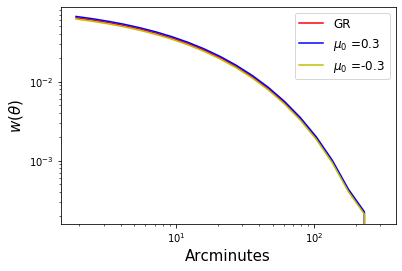

In [12]:
w_GR_C = ccl.correlation(cosmo_GR_C, ell, Cl_nc_GR_C, theta, 
                       corr_type='gg', method='fftlog')
w_1_C = ccl.correlation(cosmo_1_C, ell, Cl_nc_1_C, theta,
                       corr_type='gg', method='fftlog')
w_2_C = ccl.correlation(cosmo_2_C, ell, Cl_nc_2_C, theta, 
                       corr_type='gg', method='fftlog')

plt.figure()
plt.loglog(theta_amin, w_GR_C, 'r', label='GR')
plt.loglog(theta_amin, w_1_C, 'b', label='$\mu_0$ ='+str(mu_0[0])+"")
plt.loglog(theta_amin, w_2_C, 'y', label='$\mu_0$ ='+str(mu_0[3])+"")
plt.legend(fontsize=12)
plt.xlabel('Arcminutes', fontsize = 15)
plt.ylabel('$w(\\theta)$', fontsize=15)
plt.show()